# 6: Regresión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, RFECV

import warnings
warnings.filterwarnings('ignore')

# Carga de la data

In [2]:
df_train1 = pd.read_csv('df_train1_kpi.csv')
df_train3 = pd.read_csv('df_train3_kpi.csv')
df_train2 = pd.read_csv('df_train2_kpi.csv')
df_train4 = pd.read_csv('df_train4_kpi.csv')

df_test1 = pd.read_csv('df_test1_kpi.csv')
df_test3 = pd.read_csv('df_test3_kpi.csv')
df_test2 = pd.read_csv('df_test2_kpi.csv')
df_test4 = pd.read_csv('df_test4_kpi.csv')

In [3]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [4]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


In [5]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [7]:
df_test1.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


In [8]:
caracteristicas1 = df_train1.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas3 = df_train3.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas2 = df_train2.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas4 = df_train4.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

In [9]:
def variables(df_train, df_test, caracteristicas):
    X_train = df_train[caracteristicas]
    X_test = df_test[caracteristicas]

    y_train = df_train.rul
    y_test = df_test.RUL
    
    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test = variables(df_train1, df_test1, caracteristicas1)

# Modelado con técnicas de regresión

In [11]:
X_train.head()

,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12
0,0,-0.978417,-0.869179,-0.292733,0.365199
1,1,-0.688356,-0.965539,-0.216275,1.225379
2,2,-0.567306,-0.562371,-1.057313,1.419613
3,3,-0.833386,-0.719638,-1.038198,1.260064
4,4,-0.336628,-0.461920,-1.019084,1.100514


In [12]:
y_train.head()

0    191.0
1    190.0
2    189.0
3    188.0
4    187.0
Name: rul, dtype: float64

In [13]:
X_test.head()

,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12
0,372.0,-0.871242,-0.175323,-0.950497,0.075254
1,50.0,0.912006,-1.192854,1.295920,-0.014081
2,831.0,2.117793,-0.800015,2.368073,-1.639976
3,268.0,0.321081,-0.621532,1.193810,0.236057
4,392.0,2.188106,-0.386178,0.223766,-1.336237


In [14]:
y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

__Se creará una función que permite calcular las metricas de regresión más importantes__

In [15]:
def metricas(modelo, real, prediccion):
    
    """Calcula las metricas principales de regresión.
    
    Args:
        modelo (str): identificador del modelo empleado.
        real (series): Contiene los valores de las etiquetas de prueba.
        prediccion (series): Contiene los valores predichos.
        
    Returns:
        dataframe: Todas las metricas en un dataframe.
    
    
    """
    
    
    metricas_regresion = {'Root Mean Squared Error' : metrics.mean_squared_error(real, prediccion)**0.5, 
                         'Mean Absolute Error' : metrics.mean_absolute_error(real, prediccion),
                         'R^2' : metrics.r2_score(real, prediccion),
                         'Explained Variance' : metrics.explained_variance_score(real, prediccion),
                        }
    
    df_metricas = pd.DataFrame.from_dict(metricas_regresion, orient= 'index' )
    df_metricas.columns = [modelo]
    
    return df_metricas

__Se creará una función que permita graficar los residuales de regresión.__

# 6.1: Regresión Lineal

In [16]:
# Regresión lineal

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

linreg_metrics = metricas('Regresión Lineal', y_test, y_test_predict)
linreg_metrics

 R^2 entrenamiento: 0.556 

 R^2 prueba: -0.030


,Regresión Lineal
Root Mean Squared Error,42.183816
Mean Absolute Error,32.969338
R^2,-0.030462
Explained Variance,0.133052


In [17]:
lineal_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

lineal_pred = pd.DataFrame.from_dict(lineal_predic).T
lineal_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.00000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,141.547943,87.358637,19.564255,92.749595,59.657089,82.313473,100.289079,49.277889,78.885335,100.545515,...,4.991077,0.86201,9.296121,14.527055,132.860607,159.137638,72.342058,51.338495,127.534477,-109.699366


# 6.2: Regresión Polinomial

In [18]:
# Regresión polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

polyreg_metrics = metricas('Regresión Polinomial', y_test, y_test_predict)
polyreg_metrics

 R^2 entrenamiento: 0.596 

 R^2 prueba: 0.142


,Regresión Polinomial
Root Mean Squared Error,38.488744
Mean Absolute Error,32.312247
R^2,0.142157
Explained Variance,0.324070


In [19]:
poly_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

poly_pred = pd.DataFrame.from_dict(poly_predic).T
poly_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.00000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.00000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,142.587324,86.96444,5.217721,89.882269,44.669845,81.213958,65.790402,38.849222,75.148913,84.451996,...,-11.218446,-21.715359,14.550315,2.64483,138.954886,144.819889,48.728312,44.562457,104.681714,46.016732


# 6.3: Árboles de Decisión

In [20]:
# Regresión por árboles de decisión

dtreg = DecisionTreeRegressor(max_depth=7)
dtreg.fit(X_train, y_train)

y_test_predict = dtreg.predict(X_test)
y_train_predict = dtreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

dtreg_metrics = metricas('Árboles de Decisión', y_test, y_test_predict)
dtreg_metrics

 R^2 entrenamiento: 0.615 

 R^2 prueba: 0.182


,Árboles de Decisión
Root Mean Squared Error,37.575202
Mean Absolute Error,30.608744
R^2,0.182396
Explained Variance,0.309532


In [21]:
dt_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dt_pred = pd.DataFrame.from_dict(dt_predic).T
dt_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.00000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.00000,128.000000,137.000000,82.000000,59.000000,117.00,20.00000
Predicción,150.98528,46.222222,5.023148,60.238095,62.689189,93.263736,61.840909,27.189655,81.941176,65.514925,...,5.023148,12.010471,20.427586,10.36255,149.503375,159.189076,40.806452,46.222222,90.88,10.36255


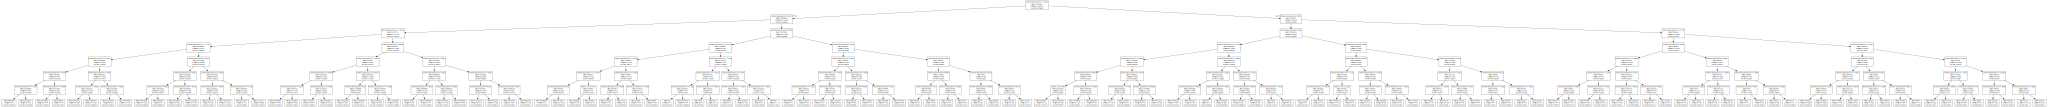

In [22]:
import graphviz

tree = export_graphviz(dtreg, out_file=None, feature_names=caracteristicas1)
graphviz.Source(tree)

In [23]:
atrib = {}

for atributo, importancia in zip(caracteristicas1, dtreg.feature_importances_):
    atrib[atributo] = importancia

importancia = pd.DataFrame.from_dict(atrib, orient = 'index').rename(columns = {0: 'Importancia'})
importancia.sort_values(by ='Importancia', ascending=False)

,Importancia
sensorMeasure11,0.691526
sensorMeasure9,0.170880
sensorMeasure4,0.096045
sensorMeasure12,0.040953
opset_id,0.000596


In [24]:
dtr_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dtr_pred = pd.DataFrame.from_dict(dtr_predic).T
dtr_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.00000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.00000,128.000000,137.000000,82.000000,59.000000,117.00,20.00000
Predicción,150.98528,46.222222,5.023148,60.238095,62.689189,93.263736,61.840909,27.189655,81.941176,65.514925,...,5.023148,12.010471,20.427586,10.36255,149.503375,159.189076,40.806452,46.222222,90.88,10.36255


# 6.4: Random Forest

In [25]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=3, n_jobs=-1)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

rf_metrics = metricas('Random Forest', y_test, y_test_predict)
rf_metrics

 R^2 entrenamiento: 0.593 

 R^2 prueba: 0.403


,Random Forest
Root Mean Squared Error,32.108340
Mean Absolute Error,24.198812
R^2,0.402997
Explained Variance,0.469039


In [26]:
rf_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

rf_pred = pd.DataFrame.from_dict(rf_predic).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.00000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.00000,82.000000,59.000000,117.00000,20.000000
Predicción,146.751534,59.057419,11.003832,93.435898,88.207267,91.795971,66.990365,37.82382,70.674909,89.344541,...,11.588596,13.324579,20.469359,10.113439,134.587446,171.57377,51.797625,45.629217,81.72946,12.931712


# 6.5: Comparando las métricas de regresión

In [27]:
all_metricas = pd.concat([linreg_metrics, polyreg_metrics, dtreg_metrics, rf_metrics], axis = 1)
all_metricas

,Regresión Lineal,Regresión Polinomial,Árboles de Decisión,Random Forest
Root Mean Squared Error,42.183816,38.488744,37.575202,32.108340
Mean Absolute Error,32.969338,32.312247,30.608744,24.198812
R^2,-0.030462,0.142157,0.182396,0.402997
Explained Variance,0.133052,0.324070,0.309532,0.469039
